In [1]:
import jax, jax.numpy as jnp
from phoenix.potentials import miyamoto_nagai_potential as Phi
from phoenix.actiontophasespace import sample_phase_from_actions

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:9: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:37: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typ

In [2]:
key = jax.random.PRNGKey(0)
N = 100_000
JR   = jnp.abs(5.0 * jax.random.normal(key, (N,)))   # kpc km/s-ish
Jz   = jnp.abs(3.0 * jax.random.normal(key, (N,)))
Jphi = jnp.full((N,), 8.0 * 220.0)                   # ~R0*Vc

In [3]:
# Miyamoto–Nagai params (example numbers)
M, a, b = 1.0, 6.0, 0.3

x,y,z,vx,vy,vz = sample_phase_from_actions(
    key, Phi,
    JR, Jz, Jphi,
    # potential params for Phi go here as *theta, e.g. M, a, b
    M, a, b,
    Rinit_for_Rc=8.0,
)

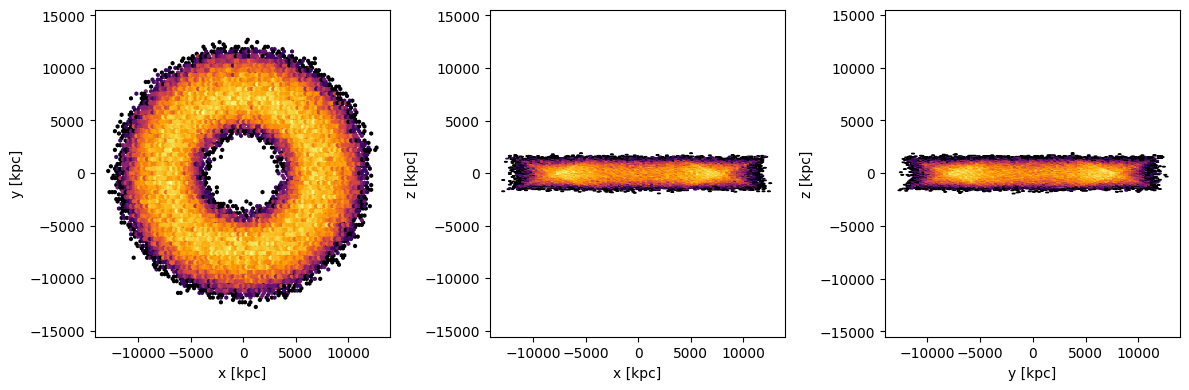

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x, y, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

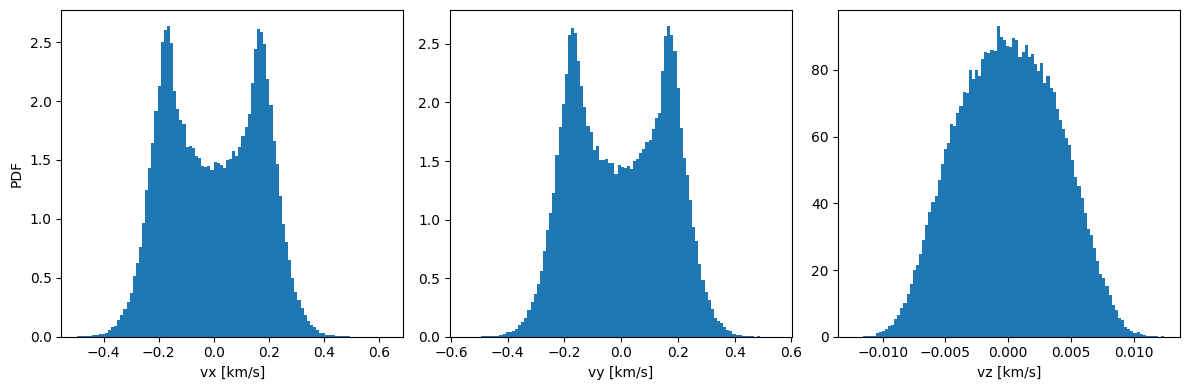

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hist(vx, bins=100, density=True)
plt.xlabel('vx [km/s]')
plt.ylabel('PDF')
plt.subplot(132)
plt.hist(vy, bins=100, density=True)
plt.xlabel('vy [km/s]')
plt.subplot(133)
plt.hist(vz, bins=100, density=True)
plt.xlabel('vz [km/s]')
plt.tight_layout()
plt.show()